En este archivo vamos a ver que tipo de relación linear pueden poseer el número de goles de un equipo en Champions de los ultimos 7 años con su ranking UEFA actual a través de una regresión linear

Primero vamos a importar las librerías necesarias

In [130]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.gofplots import ProbPlot

Ahora vamos a extraer los datos que vamos usar de todos los datasets

In [131]:
# Cargar los datos de los archivos CSV
df_goles = pd.read_csv('data/equipos-goles.csv')
df_uefa_ranking = pd.read_csv('data/UEFA_Ranking.csv')

# eliminar las columnas que no se necesitan de uefa_ranking Position,14/15,15/16,16/17,17/18,18/19,19/20,20/21,21/22,22/23,23/24,Title Points
df_uefa_ranking = df_uefa_ranking.drop(['Position','14/15', '15/16', '16/17', '17/18', '18/19', '19/20', '20/21', '21/22', '22/23', '23/24', 'Title Points'], axis=1)

# Realizar la unión de los datos utilizando la columna común (equipos)
df_merged = pd.merge(df_goles, df_uefa_ranking, left_on='Equipo', right_on='Club', how='inner')

print(df_merged, "\n")


                 Equipo  Goles                 Club  Total Points
0        Bayern München    165       Bayern München        307.00
1       Manchester City    157      Manchester City        262.00
2             Liverpool    144            Liverpool        234.00
3           Real Madrid    138          Real Madrid        363.00
4   Paris Saint-Germain    125  Paris Saint-Germain        215.00
..                  ...    ...                  ...           ...
66        APOEL Nicosia      2        APOEL Nicosia         40.00
67           AEK Athens      2           AEK Athens         24.00
68      Glasgow Rangers      2      Glasgow Rangers         68.25
69             Malmö FF      1             Malmö FF         38.50
70         FC København      1         FC København         82.50

[71 rows x 4 columns] 



In [132]:
#cabezera de la tabla
print(df_merged.head(), "\n")

                Equipo  Goles                 Club  Total Points
0       Bayern München    165       Bayern München         307.0
1      Manchester City    157      Manchester City         262.0
2            Liverpool    144            Liverpool         234.0
3          Real Madrid    138          Real Madrid         363.0
4  Paris Saint-Germain    125  Paris Saint-Germain         215.0 



In [133]:
#datos estadisticos
print(df_merged.describe(), "\n")

            Goles  Total Points
count   71.000000     71.000000
mean    31.873239    106.700704
std     39.455555     74.674515
min      1.000000      1.250000
25%      6.000000     53.500000
50%     13.000000     86.000000
75%     46.000000    149.500000
max    165.000000    363.000000 



In [134]:
#datos nulos
print(df_merged.isnull().sum(), "\n")

Equipo          0
Goles           0
Club            0
Total Points    0
dtype: int64 



In [135]:
#printea la ultima fila de la tabla
print(df_merged.tail(), "\n")

             Equipo  Goles             Club  Total Points
66    APOEL Nicosia      2    APOEL Nicosia         40.00
67       AEK Athens      2       AEK Athens         24.00
68  Glasgow Rangers      2  Glasgow Rangers         68.25
69         Malmö FF      1         Malmö FF         38.50
70     FC København      1     FC København         82.50 



Ahora vemos que correlación tienen estas dos variables a través de una matriz de correlación

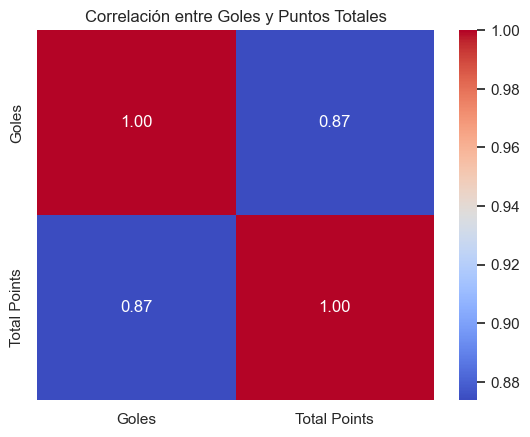

In [136]:
# Calcular la correlación entre las variables relevantes
correlation_matrix = df_merged[['Goles', 'Total Points']].corr()

# Visualizar la correlación utilizando un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Goles y Puntos Totales')
plt.show()

Ahora vamos a empezar el modelo separando los datos en train y test

In [137]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_merged[['Goles']]
y = df_merged['Total Points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio:', mse)

Error cuadrático medio: 1141.0887011441964


La visualización de la regresión:

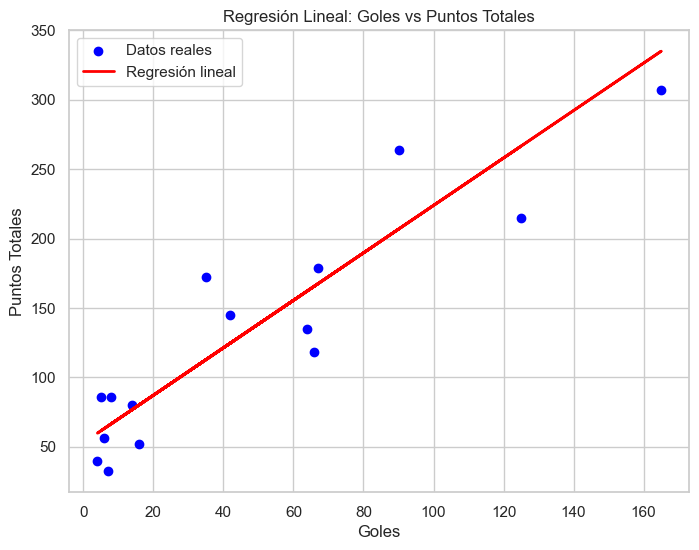

In [138]:
# Visualizar la regresión lineal
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('Goles')
plt.ylabel('Puntos Totales')
plt.title('Regresión Lineal: Goles vs Puntos Totales')
plt.legend()
plt.show()

Otras métricas interesantes:

In [139]:
# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = df_merged[['Total Points']]  # Variable independiente
y = df_merged['Goles']            # Variable dependiente

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predecir los valores de y
y_pred = model.predict(X)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)

print('Error cuadrático medio:', mse)

Error cuadrático medio: 362.7262922256193


R-Cuadrado

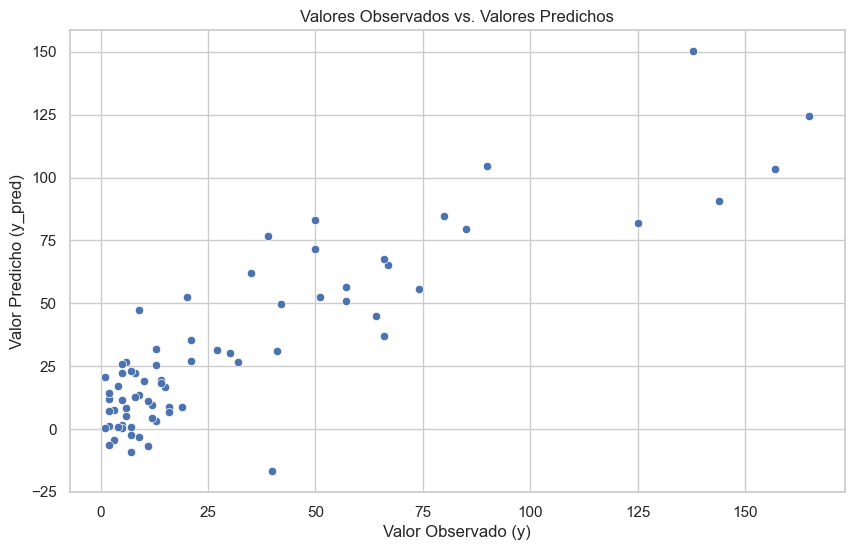

In [140]:
# Calcular el coeficiente de determinación (R-cuadrado)
r2 = r2_score(y, y_pred)

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame({'Valor Observado (y)': y,
                        'Valor Predicho (y_pred)': y_pred,
                        'Residuos': y - y_pred})

# Gráfico de dispersión de los valores observados vs. valores predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x='Valor Observado (y)', y='Valor Predicho (y_pred)')
plt.title('Valores Observados vs. Valores Predichos')
plt.xlabel('Valor Observado (y)')
plt.ylabel('Valor Predicho (y_pred)')
plt.grid(True)
plt.show()

Gráfico de residuos

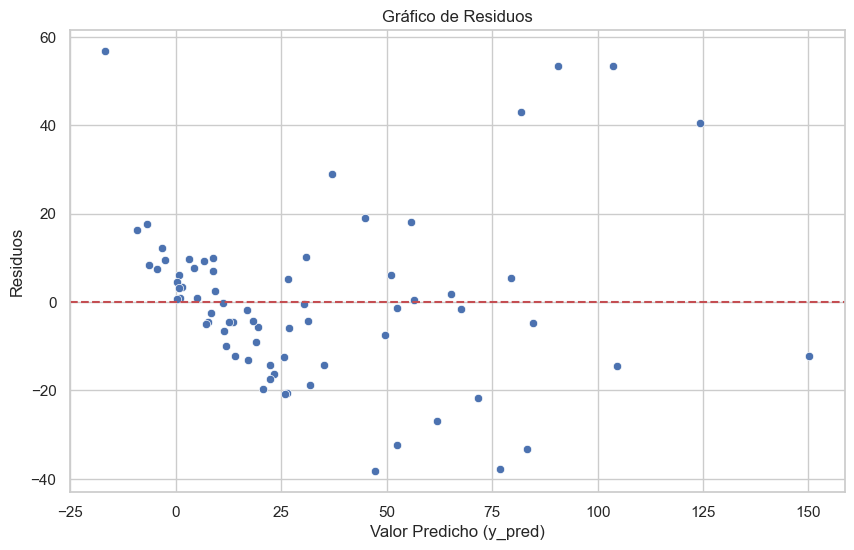

In [141]:
# Gráfico de residuos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x='Valor Predicho (y_pred)', y='Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Residuos')
plt.xlabel('Valor Predicho (y_pred)')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

Gráfico de probabilidad normal de residuos

<Figure size 1000x600 with 0 Axes>

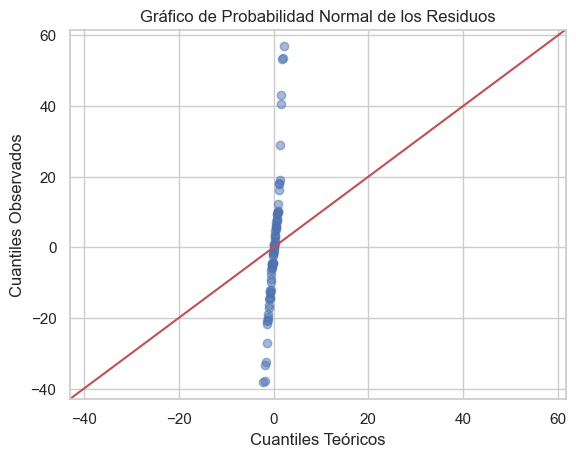

In [142]:
# Gráfico de probabilidad normal de los residuos
QQ = ProbPlot(results['Residuos'])
plt.figure(figsize=(10, 6))
QQ.qqplot(line='45', alpha=0.5, fmt='b', lw=2)
plt.title('Gráfico de Probabilidad Normal de los Residuos')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles Observados')
plt.grid(True)
plt.show()

En conclusión, está claro que el número de goles metidos en los últimos 7 años es relevante o tiene relación con el ranking UEFA actual. Esta relación parece tener una tendencia linear de forma que, a mayor número de goles mayor será el ranking concedido.